In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/housing_dataset.csv')
# Define the feature matrix X and target vector y
X = df[["RM", "LSTAT", "PTRATIO"]]
y = df["MEDV"]
print(df)
# Split the data into train and test datasets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=80)



Mounted at /content/drive


In [ ]:
# Housing_dataset.csv download: https://drive.google.com/file/d/1iGxEjAf9TOmdzVPSvUnWRJP_4DlBawZo/view?usp=sharing

class HousePricePredictionModel:
    """
    A model predict price of house based on average number of rooms per dwelling (RM),
    lower status of the population (LSTAT) and pupil-teacher ratio by town (PTRATIO)
    """
    def __init__(self, X, y):
        self.X = np.c_[np.ones(X.shape[0]), X]  # Add intercept column
        self.y = y
        self.intercept: int | None = None
        self.coefficients: list | None = None

        # Compute X^T X
        X_transpose = self.X.T
        X_transpose_X = np.dot(X_transpose, self.X)

        # Compute (X^T X)^-1
        X_transpose_X_inv = np.linalg.inv(X_transpose_X)

        # Compute X^T y
        X_transpose_y = np.dot(X_transpose, self.y)

        # Compute intercept and coefficients
        result = np.dot(X_transpose_X_inv, X_transpose_y)
        self.intercept = result[0]
        self.coefficients = result[1:]

    def predict_price(self, rm, lstat, ptratio):
        """
        Predicts the house price based on rm, lstats and ptratio

        Parameters:
        ----
        - rm (float): The average number of rooms per dwelling (RM).
        - lstat (float): The percentage of the population with lower socioeconomic status (LSTAT).
        - ptratio (float): The pupil-teacher ratio by town (PTRATIO).

        Returns:
        ----
        - float: the house price (MEDV).
        """
        return self.intercept + self.coefficients[0]*rm + self.coefficients[1]*lstat + self.coefficients[2]*ptratio

def draw_scatter_plot(x_data, y_data):
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, color='blue', alpha=0.6,
                label='Predicted vs Actual')
    plt.plot([x_data.min(), x_data.max()], [x_data.min(), x_data.max()],
             color='red', lw=2, label='Ideal Prediction Line')
    plt.title('Comparison of Predicted vs Actual House Prices')
    plt.xlabel('Actual House Prices')
    plt.ylabel('Predicted House Prices')
    plt.legend()
    plt.grid(True)
    plt.show()

def draw_line_chart(x_data, y_data):
    plt.plot(range(len(y_data)), y_data, label="Actual Prices", color='blue', marker='o', linestyle='-', linewidth=2)
    plt.plot(range(len(x_data)), x_data, label="Predicted Prices", color='red', marker='x', linestyle='--', linewidth=2)

    plt.xlabel('Index')
    plt.ylabel('Price ($)')
    plt.title('Actual vs Predicted Housing Prices')

    plt.legend()

    plt.grid(True)
    plt.show()

In [ ]:
# Initialize model with training datasets
model = HousePricePredictionModel(X_train, y_train)

In [ ]:
# Make predictions on the test set
predictions = [model.predict_price(row["RM"], row["LSTAT"], row["PTRATIO"]) for _, row in X_test.iterrows()]

# Calculate Mean Squared Error (MSE)/R-squared score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
..     ...    ...      ...       ...
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

[489 rows x 4 columns]
Mean Squared Error: 3244080172.0258646
Root Mean Squared Error: 56956.827264392676
R-squared: 0.813643644906308


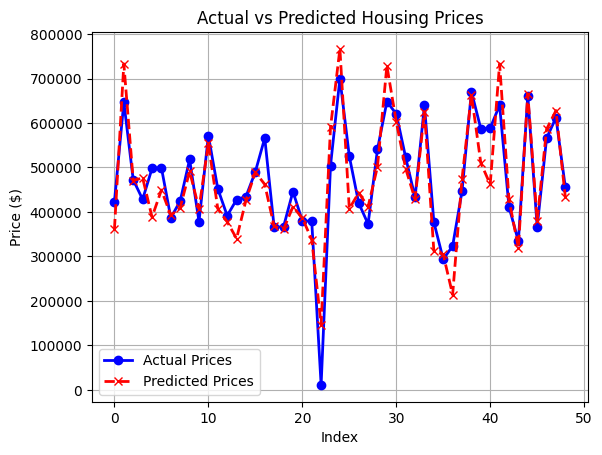

In [ ]:
draw_line_chart(y_test, predictions)

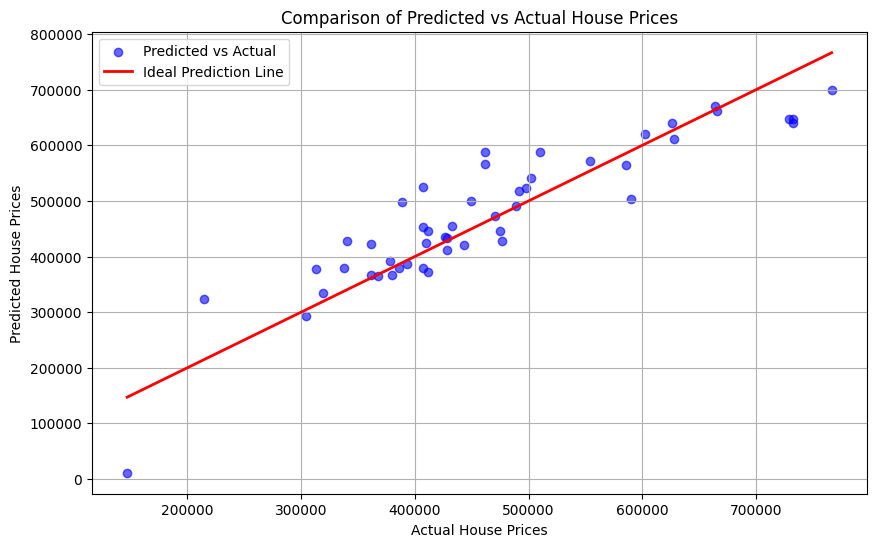

In [ ]:
draw_scatter_plot(y_test, predictions)